In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df = df.drop(['Unnamed: 0'],axis =1)

In [5]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.duplicated().sum()

0

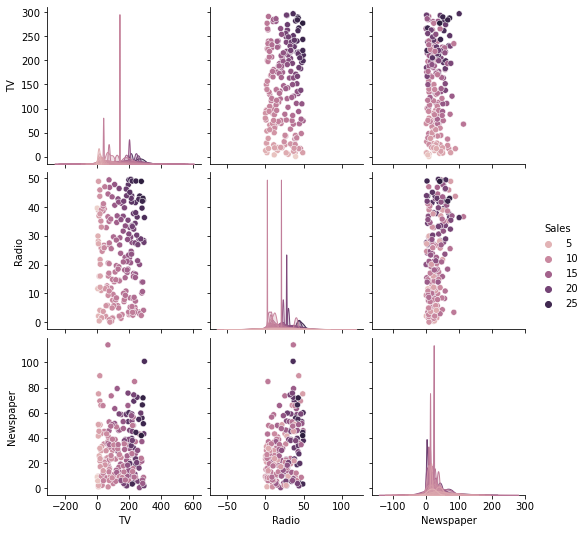

In [8]:
sns.pairplot(df,hue='Sales')

<AxesSubplot:xlabel='TV', ylabel='Sales'>

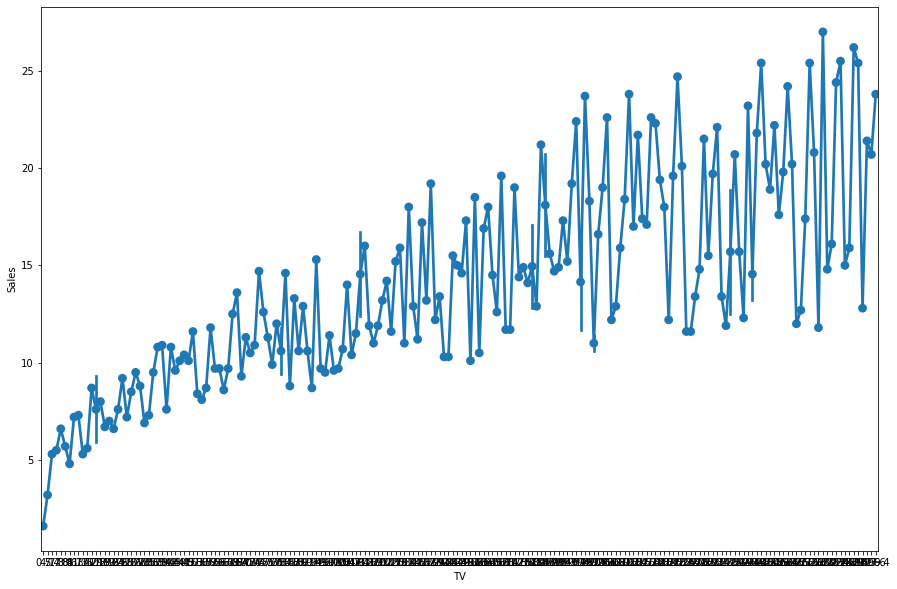

In [9]:
plt.figure(figsize=(15,10))
sns.pointplot(x='TV',y='Sales',data=df)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

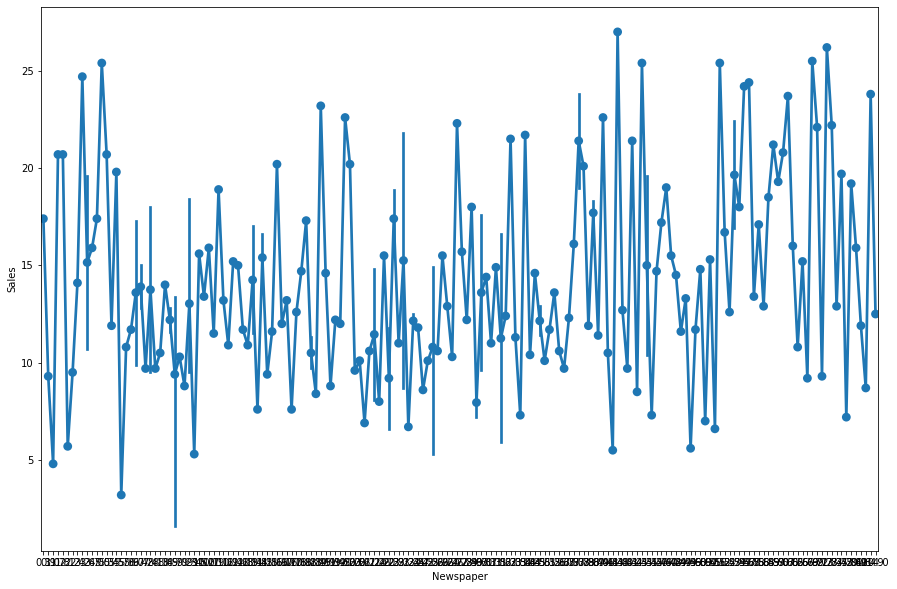

In [10]:
plt.figure(figsize=(15,10))
sns.pointplot(x='Newspaper',y='Sales',data=df)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

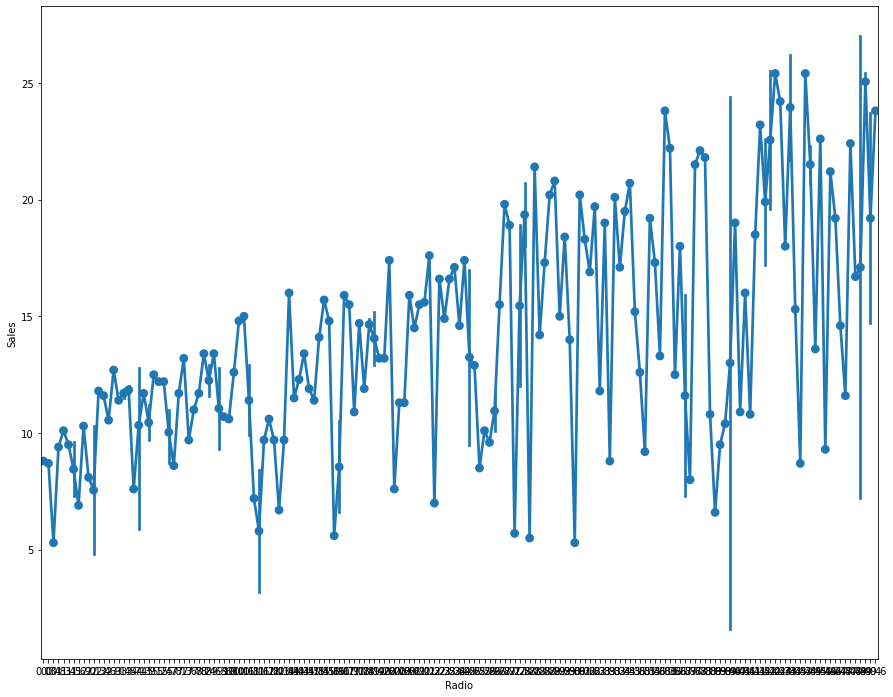

In [11]:
plt.figure(figsize=(15,12))
# plt.xlim(0,1000,100)
sns.pointplot(x='Radio',y='Sales',data=df)

In [12]:
factors = df.iloc[:,:3]

In [13]:
sales = df['Sales']

In [14]:
factors

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [15]:
sales

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(factors,sales,test_size = 0.15,random_state=100)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
print('X Train:',x_train.shape)
print('X Test:',x_test.shape)
print('Y Train:',y_train.shape)
print('Y Test:',y_test.shape)

X Train: (170, 3)
X Test: (30, 3)
Y Train: (170,)
Y Test: (30,)


In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
sales_pred = model.predict(x_test)

In [21]:
print(sales_pred)

[10.55895007 20.00789046 16.82138929 19.08348217 20.89526303 13.28498213
 11.91569024 12.51924503 20.47601428 20.86344639 10.93794693 19.43915618
  6.594757   15.31706697  9.10594296  8.10624565 16.24619001 12.15109722
 17.09447127 11.33160215 17.05064877  9.90959158 20.66482649 17.16798667
 15.20236974 21.89114785 19.13974383 10.14658082 19.34979706 14.87748164]


In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,sales_pred)
print('R2 Score:',r2)

R2 Score: 0.9207184248029235
